In [1]:
#import the necessary libraries
import csv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:

# Load the Excel file into a DataFrame
file_path = 'Economic-Performance.xlsx'
df = pd.read_excel(file_path)
df.head()

,"Table 2.1: Gross Domestic Product by Activity, 2018 - 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,Current Prices - KSh Million
1,Industry,2018.0,2019.0,2020+,2021+,2022*
2,"Agriculture, forestry and fishing…………………………………...",1897475.0,2135709.0,2432613,2583190,2829505
3,Growing of crops………………………………………………......,1356544.0,1542584.0,1786518,1844730,2036197
4,Animal production……………………………………………...,341275.0,354712.0,384578,431700,463869


In [3]:
# Assign proper column names
column_names = ['Industry', '2018', '2019', '2020', '2021', '2022']
df.columns = column_names

# Extract the "Growing of crops" row
growing_of_crops_row = df[df['Industry'] == 'Growing of crops']

# Extract relevant columns (columns containing the years)
growing_of_crops_data = growing_of_crops_row.iloc[:, 1:]

# Display the resulting DataFrame
growing_of_crops_data

,2018,2019,2020,2021,2022


In [4]:

# Convert the columns to float
growing_of_crops_data = growing_of_crops_data.apply(pd.to_numeric, errors='coerce')

# Display the resulting DataFrame
growing_of_crops_data

,2018,2019,2020,2021,2022


In [5]:
# Filter rows containing "Growing of crops" in the "Industry" column
growing_of_crops_row = df[df['Industry'].str.contains('Growing of crops', case=False, na=False, regex=True)]


In [6]:
growing_of_crops_row 

,Industry,2018,2019,2020,2021,2022
3,Growing of crops………………………………………………......,1356544.0,1542584.0,1786518,1844730,2036197


In [7]:
growing_of_crops_row.describe()

,2018,2019
count,1.0,1.0
mean,1356544.0,1542584.0
std,NaN,NaN
min,1356544.0,1542584.0
25%,1356544.0,1542584.0
50%,1356544.0,1542584.0
75%,1356544.0,1542584.0
max,1356544.0,1542584.0


In [8]:

# DataFrame has columns 'Year' and 'GDP'
# You may need to adjust column names accordingly
growing_of_crops_data = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022],
    'GDP': [1356544.0, 1542584.0, 1786518.0, 1844730.0, 2036197.0]
})

# Extract numeric values from 'Year' column, ignoring errors for non-numeric values
growing_of_crops_data['Year'] = growing_of_crops_data['Year'].apply(pd.to_numeric, errors='coerce')




In [9]:

# Extract numeric values from 'Year' column, ignoring errors for non-numeric values
growing_of_crops_data['Year'] = growing_of_crops_data['Year'].apply(pd.to_numeric, errors='coerce')

# Set 'Year' column as index
growing_of_crops_data.set_index('Year', inplace=True)


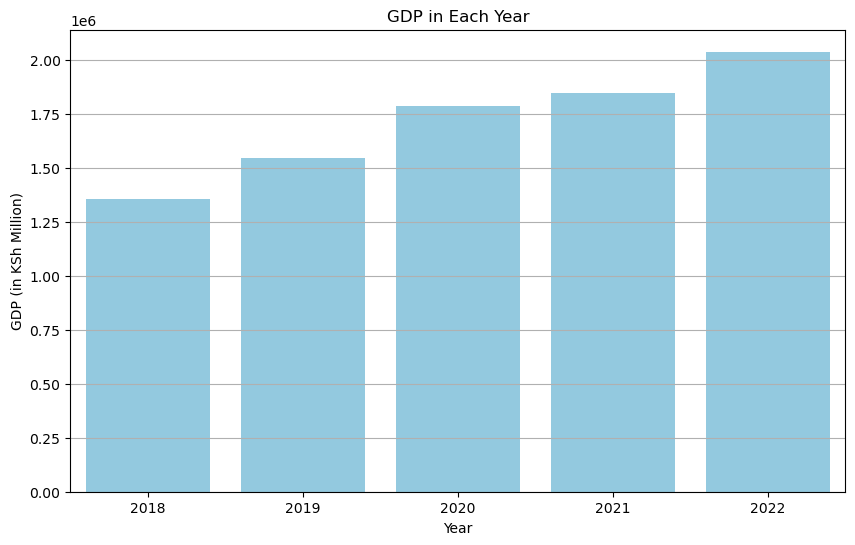

In [10]:
# Bar plot for GDP in each year
plt.figure(figsize=(10, 6))
sns.barplot(x=growing_of_crops_data.index, y='GDP', data=growing_of_crops_data, color='skyblue')
plt.title('GDP in Each Year')
plt.xlabel('Year')
plt.ylabel('GDP (in KSh Million)')
plt.grid(axis='y')
plt.show()

In [11]:
# Convert 'Year' to integers 
growing_of_crops_data.index = growing_of_crops_data.index.astype(int)

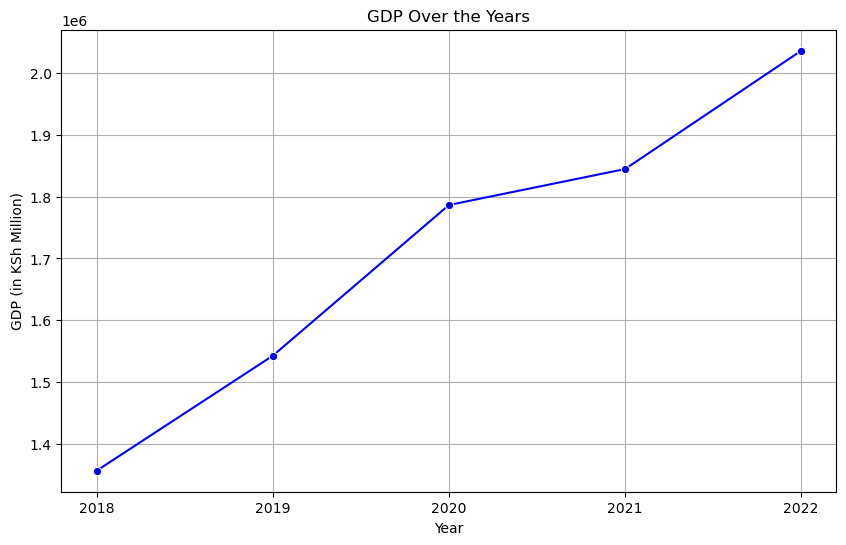

In [12]:
# Line plot for GDP over the years

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP', data=growing_of_crops_data, marker='o', color='blue')
plt.title('GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (in KSh Million)')
plt.grid(True)
plt.xticks(growing_of_crops_data.index)
plt.show()

In [13]:
df2 = pd.read_csv('Temperature.csv')
df2.head()

,"Table 8.16: Mean Annual Maximum and Minimum Temperatures by Region, 2012-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Degree Celsius
1,Region,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022
2,Maximum Temperatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N-Western,35.5,35.9,36.2,36.0,35.9,35.0,36.0,35.4,36.1,35.9
4,N-Eastern,30.9,33.0,32.9,33.0,33.5,31.4,32.5,31.3,31.0,32.1


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Table 8.16: Mean Annual Maximum and Minimum Temperatures by Region, 2012-2022  22 non-null     object 
 1   Unnamed: 1                                                                     19 non-null     float64
 2   Unnamed: 2                                                                     19 non-null     float64
 3   Unnamed: 3                                                                     19 non-null     float64
 4   Unnamed: 4                                                                     19 non-null     float64
 5   Unnamed: 5                                                                     19 non-null     float64
 6   Unnamed: 6                  

In [15]:
df2.isnull().sum()

Table 8.16: Mean Annual Maximum and Minimum Temperatures by Region, 2012-2022    1
Unnamed: 1                                                                       4
Unnamed: 2                                                                       4
Unnamed: 3                                                                       4
Unnamed: 4                                                                       4
Unnamed: 5                                                                       4
Unnamed: 6                                                                       4
Unnamed: 7                                                                       4
Unnamed: 8                                                                       4
Unnamed: 9                                                                       4
Unnamed: 10                                                                      3
dtype: int64

In [16]:
# Drop unnecessary rows or columns (if any)
df2 = df2.dropna()
df2

,"Table 8.16: Mean Annual Maximum and Minimum Temperatures by Region, 2012-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
1,Region,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022
3,N-Western,35.5,35.9,36.2,36.0,35.9,35.0,36.0,35.4,36.1,35.9
4,N-Eastern,30.9,33.0,32.9,33.0,33.5,31.4,32.5,31.3,31.0,32.1
5,Western,26.2,26.2,26.9,26.6,26.2,25.3,26.6,25.8,26.3,26.5
6,C-Rift Valley,24.0,24.4,24.9,24.7,25.3,24.0,25.2,24.1,24.6,24.9
7,Central,23.9,24.0,24.6,24.0,25.0,24.1,25.2,24.4,24.9,25.0
8,Nairobi,25.5,25.7,26.3,25.8,26.0,24.4,25.3,24.7,24.1,24.9
9,S-Eastern,28.6,28.5,29.2,28.9,29.0,28.2,28.9,28.3,30.6,28.8
10,Coastal,30.5,30.7,30.9,31.0,31.0,30.7,31.0,30.8,31.0,30.5
11,Country,28.1,28.5,29.0,28.7,29.0,27.9,28.8,28.1,28.6,28.6


In [17]:
df2.columns

Index(['Table 8.16: Mean Annual Maximum and Minimum Temperatures by Region, 2012-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [18]:
df2.columns = ['Region', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df2.columns

Index(['Region', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [19]:
# Ensure data types are appropriate
df2['Region'] = df2['Region'].astype(str)

In [20]:
df2.head()

,Region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Region,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022
3,N-Western,35.5,35.9,36.2,36.0,35.9,35.0,36.0,35.4,36.1,35.9
4,N-Eastern,30.9,33.0,32.9,33.0,33.5,31.4,32.5,31.3,31.0,32.1
5,Western,26.2,26.2,26.9,26.6,26.2,25.3,26.6,25.8,26.3,26.5
6,C-Rift Valley,24.0,24.4,24.9,24.7,25.3,24.0,25.2,24.1,24.6,24.9


In [21]:
df2.drop(1, inplace=True)

In [22]:
df2.head()

,Region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,N-Western,35.5,35.9,36.2,36.0,35.9,35.0,36.0,35.4,36.1,35.9
4,N-Eastern,30.9,33.0,32.9,33.0,33.5,31.4,32.5,31.3,31.0,32.1
5,Western,26.2,26.2,26.9,26.6,26.2,25.3,26.6,25.8,26.3,26.5
6,C-Rift Valley,24.0,24.4,24.9,24.7,25.3,24.0,25.2,24.1,24.6,24.9
7,Central,23.9,24.0,24.6,24.0,25.0,24.1,25.2,24.4,24.9,25.0


In [23]:
df2.columns

Index(['Region', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [24]:
df2.head()

,Region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,N-Western,35.5,35.9,36.2,36.0,35.9,35.0,36.0,35.4,36.1,35.9
4,N-Eastern,30.9,33.0,32.9,33.0,33.5,31.4,32.5,31.3,31.0,32.1
5,Western,26.2,26.2,26.9,26.6,26.2,25.3,26.6,25.8,26.3,26.5
6,C-Rift Valley,24.0,24.4,24.9,24.7,25.3,24.0,25.2,24.1,24.6,24.9
7,Central,23.9,24.0,24.6,24.0,25.0,24.1,25.2,24.4,24.9,25.0


In [25]:
#statistic summary
df2.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,22.666667,22.922222,23.227778,23.138889,23.150000,22.527778,23.283333,22.961111,23.061111
std,7.028848,7.210985,7.291801,7.240258,7.443374,6.977258,7.066512,6.734995,7.137155
min,10.300000,10.400000,10.700000,10.500000,10.200000,10.700000,11.200000,11.700000,10.900000
25%,17.125000,17.225000,17.500000,17.425000,17.350000,17.200000,17.700000,17.425000,17.850000
50%,23.950000,24.100000,24.650000,24.350000,24.500000,24.050000,24.750000,24.300000,24.100000
75%,27.625000,27.925000,28.475000,28.175000,28.300000,27.250000,28.250000,27.525000,28.025000
max,35.500000,35.900000,36.200000,36.000000,35.900000,35.000000,36.000000,35.400000,36.100000


In [26]:
#drop the country column its the mean of the maximum temperature
df2 = df2[df2['Region'] != 'Country']

In [27]:
df2.tail()

,Region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
16,C-Rift Valley,10.3,10.4,10.7,10.5,10.2,10.7,11.2,11.7,10.9,11.9
17,Central,13.4,13.6,13.4,13.6,12.8,13.0,13.4,13.5,12.5,13.1
18,Nairobi,14.1,14.4,14.4,14.3,14.6,14.3,14.8,14.9,14.4,15.4
19,S-Eastern,17.1,17.2,17.5,17.4,17.5,17.2,17.7,17.3,18.9,18.1
20,Coastal,23.5,23.7,23.9,24.0,24.0,23.5,24.3,24.2,24.1,24.5


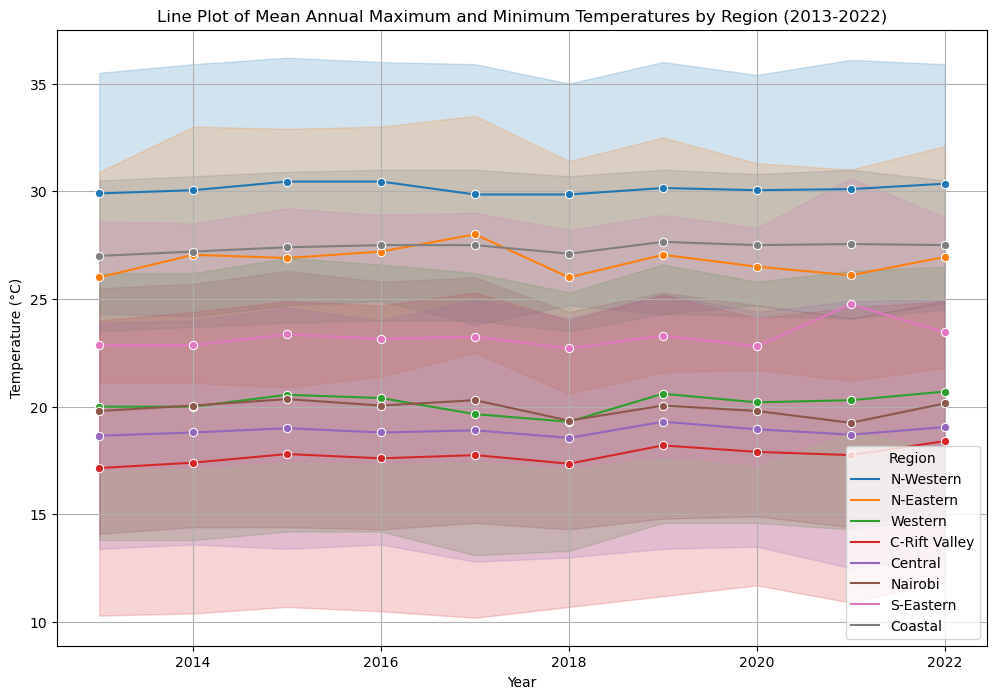

In [28]:

# Melt the DataFrame for a line plot
df2_melted = pd.melt(df2, id_vars=['Region'], var_name='Year', value_name='Temperature')

# Convert the 'Year' and 'Temperature' columns to numeric
df2_melted['Year'] = pd.to_numeric(df2_melted['Year'], errors='coerce')
df2_melted['Temperature'] = pd.to_numeric(df2_melted['Temperature'], errors='coerce')

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Temperature', hue='Region', data=df2_melted, marker='o')
plt.title('Line Plot of Mean Annual Maximum and Minimum Temperatures by Region (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


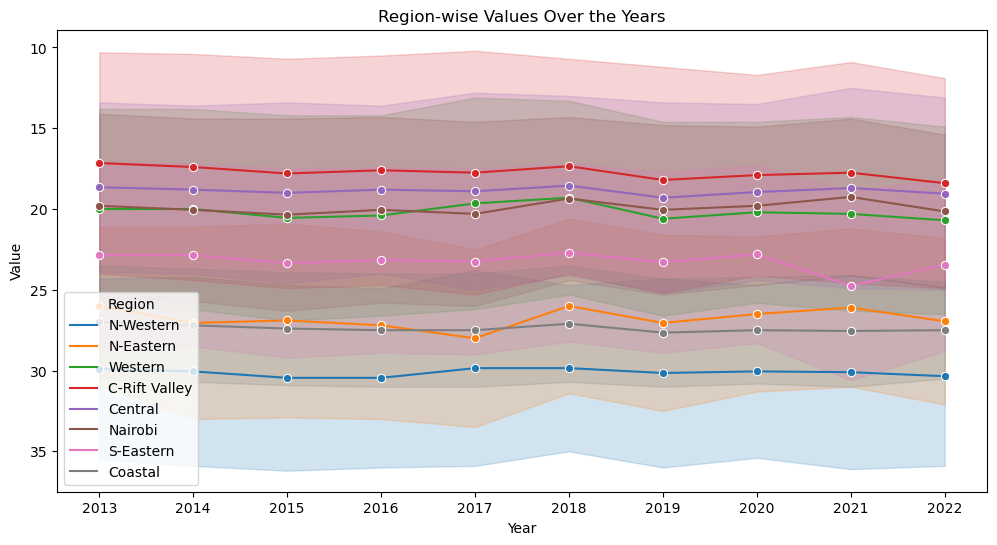

In [29]:
# Melt the dataframe to have 'year' as x-axis and 'value' as y-axis
df2_melted = pd.melt(df2, id_vars=['Region'], var_name='Year', value_name='Value')

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Region', data=df2_melted, marker='o')
plt.title('Region-wise Values Over the Years')
plt.show()

## Modelling
### Model: Time Series Forecasting and Regression
Algorithm: SARIMA (Seasonal Autoregressive Integrated Moving Average) or LSTM (Long Short-Term Memory) for prediction on the agricultural contribution towards GDP. Lasso Regression, Ridge Regression, or Gradient Boosting to estimate the contribution of agricultural practices to GDP.
 

C:\Users\celes\AppData\Local\Temp\ipykernel_1496\1391242063.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[temperature_columns] = df2[temperature_columns].apply(pd.to_numeric, errors='coerce')


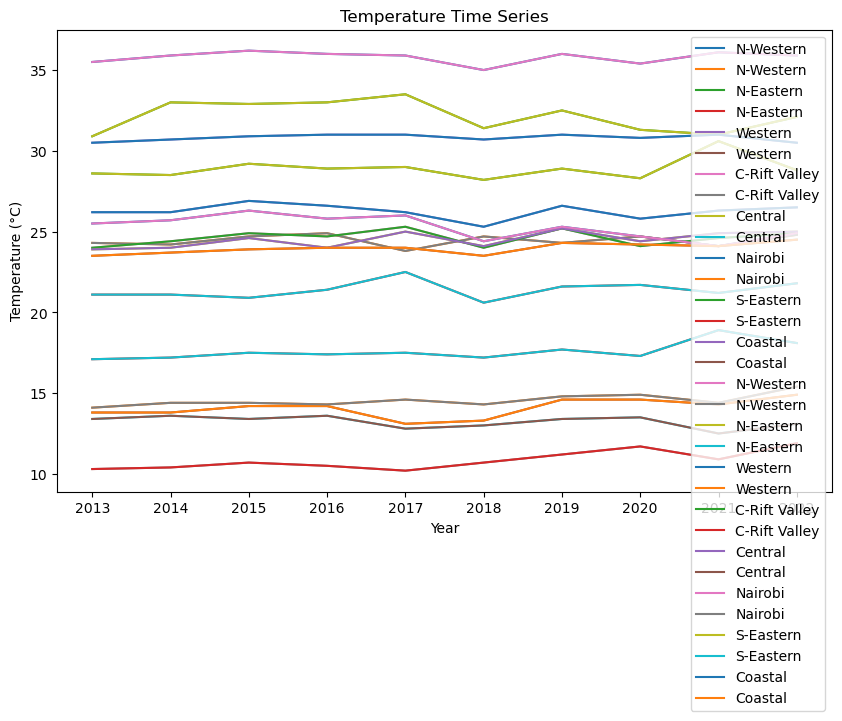

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import mse
from sklearn.model_selection import train_test_split

# Replace 'Region' and 'Temperature' with the actual column names
region_column = 'Region'
temperature_columns = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Convert years to datetime
df2[temperature_columns] = df2[temperature_columns].apply(pd.to_numeric, errors='coerce')

# Set 'Region' as the index using set_index
df2.set_index(region_column, inplace=True)

# Transpose the DataFrame to have 'Year' as the index
df2_transposed = df2[temperature_columns].transpose()

# Visualize the time series data
plt.figure(figsize=(10, 6))
for region in df2_transposed.columns:
    plt.plot(df2_transposed.index, df2_transposed[region], label=region)

plt.title('Temperature Time Series')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


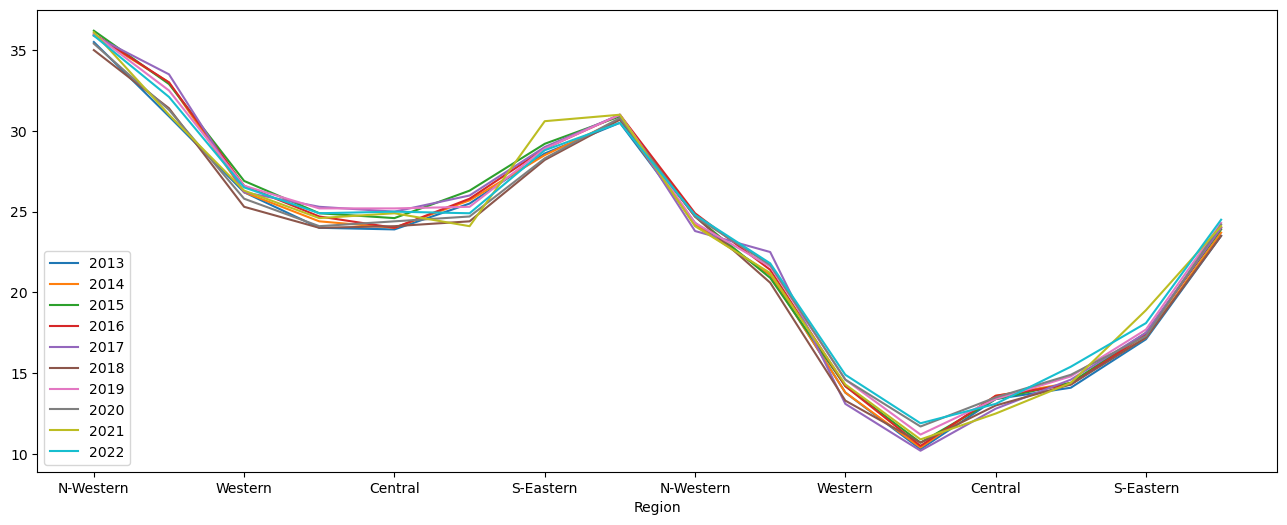

In [31]:
%matplotlib inline

df2.plot(figsize = (16,6));

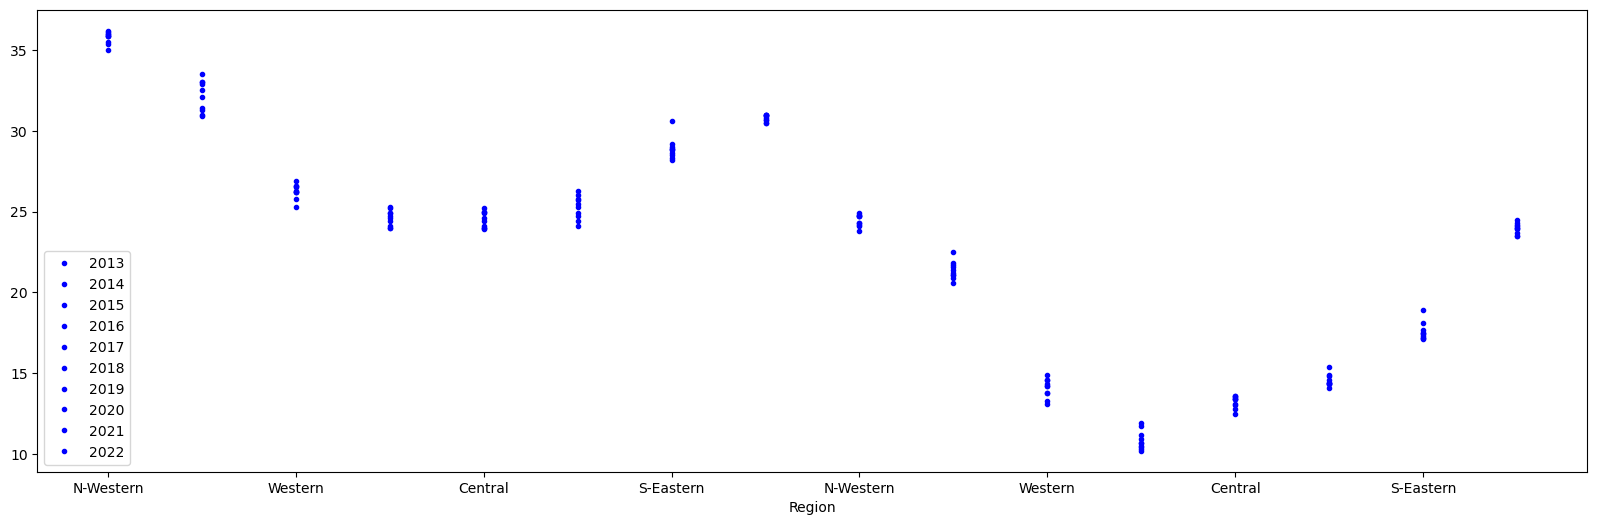

In [32]:
# Draw a dot plot using temp and .plot() method 
df2.plot(figsize = (20,6), style = '.b');

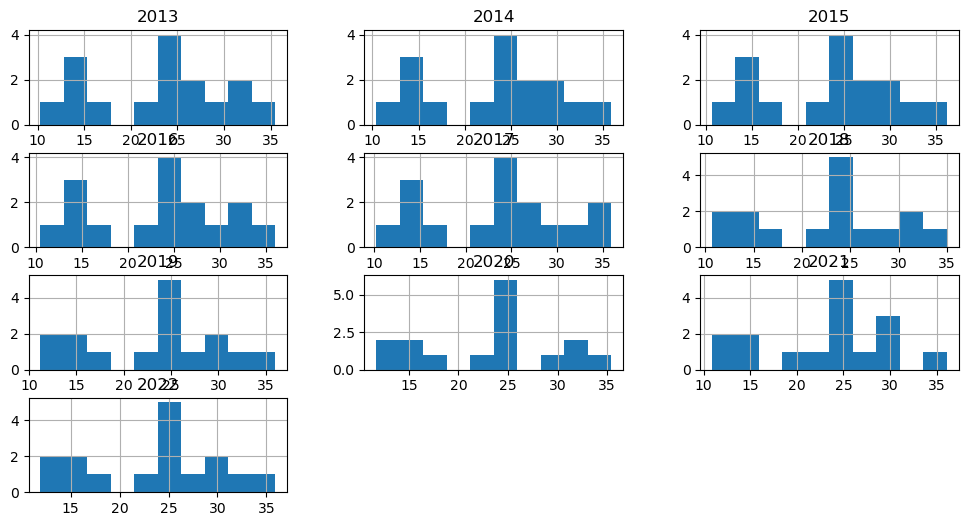

In [33]:
df2.hist(figsize = (12,6));

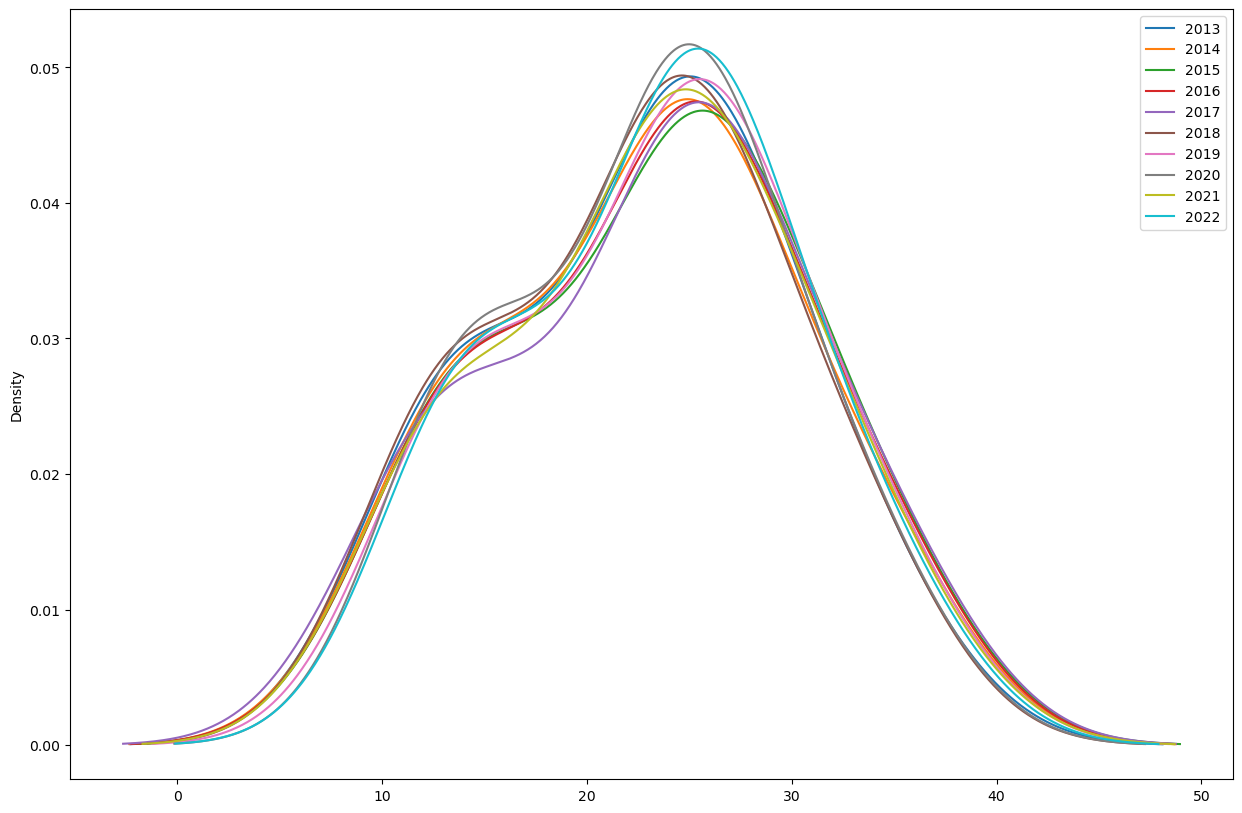

In [34]:
# Plot a density plot for the dataset
df2.plot(kind='kde', figsize = (15,10));

In [35]:
roll_mean = df2_transposed.rolling(window=8, center=False).mean()
roll_std = df2_transposed.rolling(window=8, center=False).std()

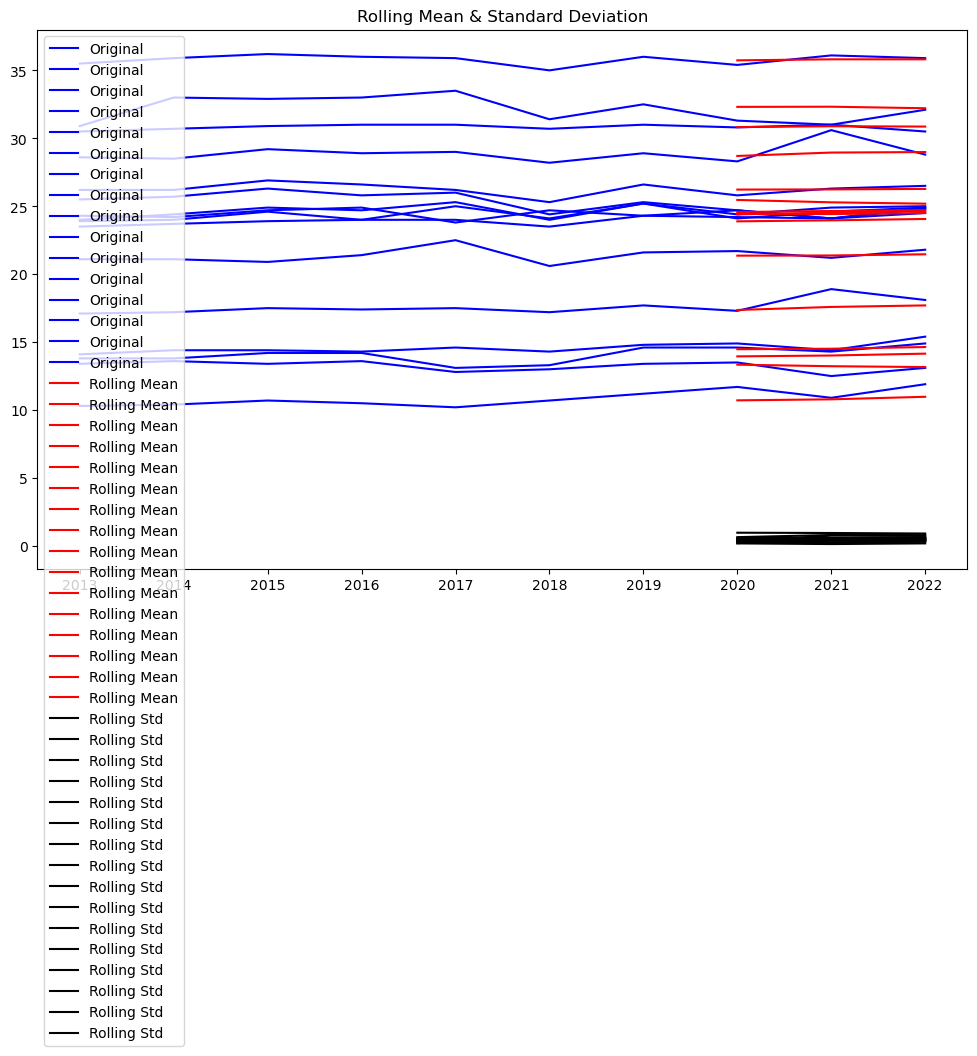

In [36]:
fig = plt.figure(figsize=(12,7))
plt.plot(df2_transposed, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [37]:
# Perform train-test split
train_data, test_data = train_test_split(df2_transposed, test_size=0.2, shuffle=False)


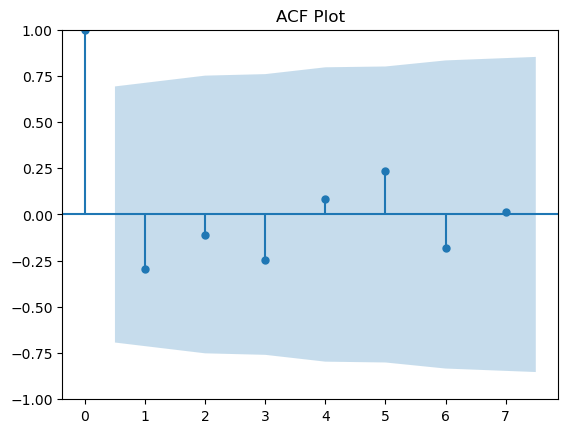

In [38]:


# Plot ACF and PACF for analysis
plot_acf(train_data.mean(axis=1).dropna(), lags=min(20, len(train_data)-1))
plt.title('ACF Plot')
plt.show()


In [39]:
import statsmodels.api as sm

# Select the first two regions for illustration
endog_variable_1 = df2_transposed.iloc[:, 3]  # replace 0 with the actual index of the first region
endog_variable_2 = df2_transposed.iloc[:, 4]  # replace 1 with the actual index of the second region

# Instantiate ARIMA models for each region
mod_arma_1 = sm.tsa.ARIMA(endog_variable_1, order=(1, 0, 0))
results_arma_1 = mod_arma_1.fit()

mod_arma_2 = sm.tsa.ARIMA(endog_variable_2, order=(1, 0, 0))
results_arma_2 = mod_arma_2.fit()

# Print model summaries
print("Summary for Region 1:")
print(results_arma_1.summary())

print("\nSummary for Region 2:")
print(results_arma_2.summary())


Summary for Region 1:
                               SARIMAX Results                                
Dep. Variable:          C-Rift Valley   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  -4.913
Date:                Mon, 22 Jan 2024   AIC                             15.827
Time:                        21:21:42   BIC                             16.734
Sample:                    01-01-2013   HQIC                            14.831
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6217      0.094    261.643      0.000      24.437      24.806
ar.L1         -0.5167      0.360     -1.435      0.151      -1.223       0.189
sigma2         0.1516      0.1

C:\Users\celes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\celes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\celes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\celes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\celes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

In [42]:
# Print out the estimate for the constant and for theta
print(results_arma_2.params)

const     24.512464
ar.L1     -0.246250
sigma2     0.206675
dtype: float64
